In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\german_credit_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [6]:

df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Text(0.5, 1.0, 'Missing values in dataset')

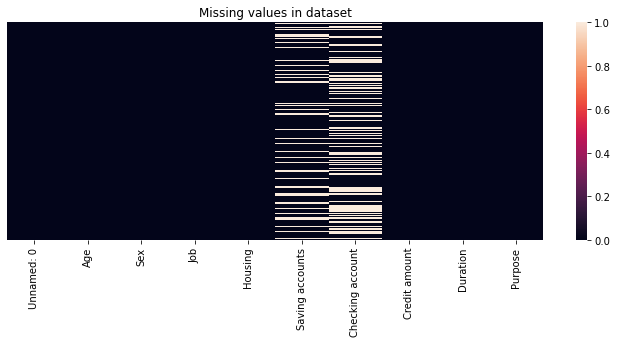

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar='inferno',yticklabels=False)
plt.title("Missing values in dataset")

In [8]:
numerical=["Age","Job","Credit amount","Duration"]
categorical=["Saving accounts","Checking account","Purpose","Sex","Housing"]
unused=["Unnamed: 0"]

In [9]:
for cat in categorical:
    df[cat]=df[cat].fillna(df[cat].mode().values[0])

In [10]:
categorical

['Saving accounts', 'Checking account', 'Purpose', 'Sex', 'Housing']

In [11]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

<AxesSubplot:>

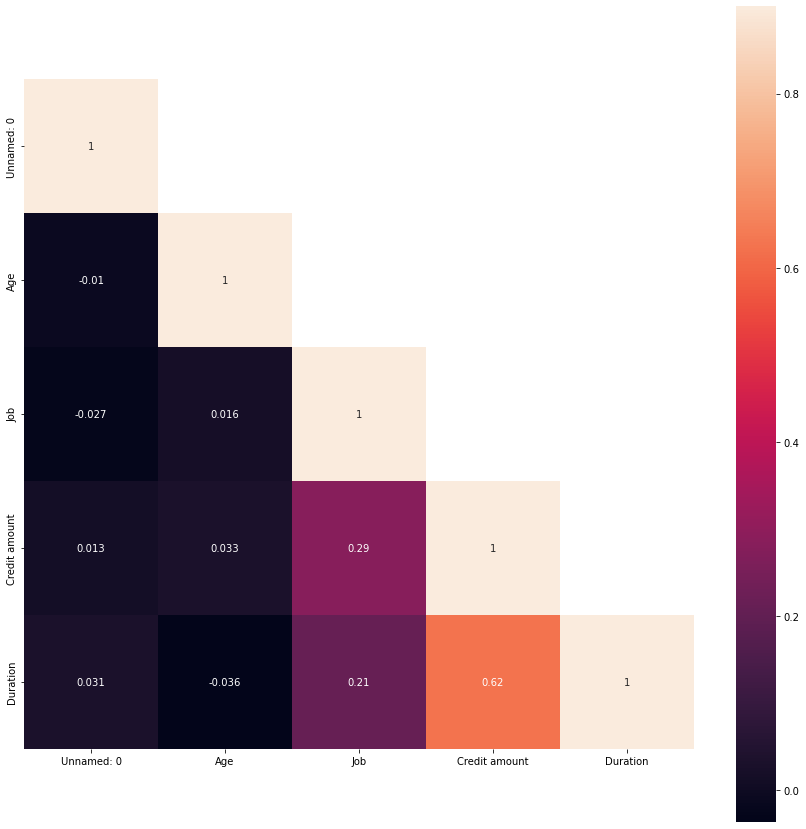

In [12]:
corr = df.corr(method='pearson')
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
#mask the duplicate value that occurein the correlation using pearsons
fig,ax=plt.subplots(figsize=(15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr,mask=mask,vmax=0.9,square=True,annot=True)

In [13]:
df.corrwith(df['Credit amount'],axis=0)

Unnamed: 0       0.013488
Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

In [14]:
df.drop(columns='Unnamed: 0',axis='columns',inplace=True)

In [15]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [16]:

from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
dfe=df.copy()
dfe.Sex=le.fit_transform(dfe.Sex)
dfe.Housing=le.fit_transform(dfe.Housing)
dfe['Saving accounts']=le.fit_transform(dfe['Saving accounts'])

In [19]:


dfe1=df.copy()

In [20]:
dfe.drop("Purpose",axis=1,inplace=True)

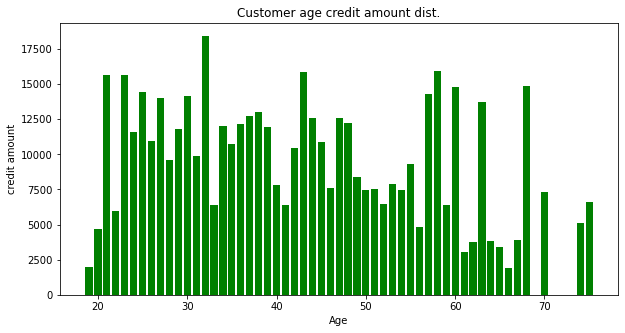

In [21]:
plt.figure(figsize=(10,5))
plt.bar(df["Age"],df["Credit amount"],color="green")
plt.xlabel("Age")
plt.ylabel("credit amount")
plt.title("Customer age credit amount dist.")
plt.show()

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

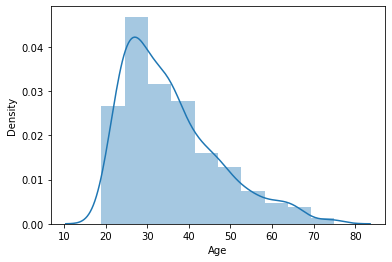

In [22]:
#nkde plplots
sns.distplot(df["Age"],bins=10,kde=True)

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

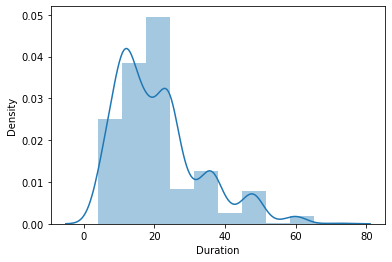

In [23]:
sns.distplot(df["Duration"],bins=10,kde=True)

In [24]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [25]:
dfe1=df.copy()

In [26]:
dfe1.drop('Saving accounts',axis=1,inplace=True)

In [27]:
dfe1.Job=dfe1.Job.astype(str)

In [28]:

dfe1=dfe1[['Job','Sex','Age','Credit amount','Duration','Housing','Purpose']]

In [29]:
dfe1.head(2)

,Job,Sex,Age,Credit amount,Duration,Housing,Purpose
0,2,male,67,1169,6,own,radio/TV
1,2,female,22,5951,48,own,radio/TV


In [30]:
X1=pd.get_dummies(dfe1)
X1.head()

,Age,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,22,5951,48,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [31]:
df_clusture=pd.DataFrame()

In [32]:
df_clusture['Credit amount']=df['Credit amount']
df_clusture['Age']=df['Age']
df_clusture['Duration']=df['Duration']
df_clusture['Job']=df['Job']

In [33]:
df_clusture_log=np.log(df_clusture[['Credit amount','Age','Duration']])

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
clusture_scaled=scaler.fit_transform(df_clusture_log)

In [36]:
from sklearn.cluster import KMeans

In [37]:
#elbo method to determine no of clusture
sum_of_squared_distances=[]
K =range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(clusture_scaled)
    sum_of_squared_distances.append(km.inertia_)

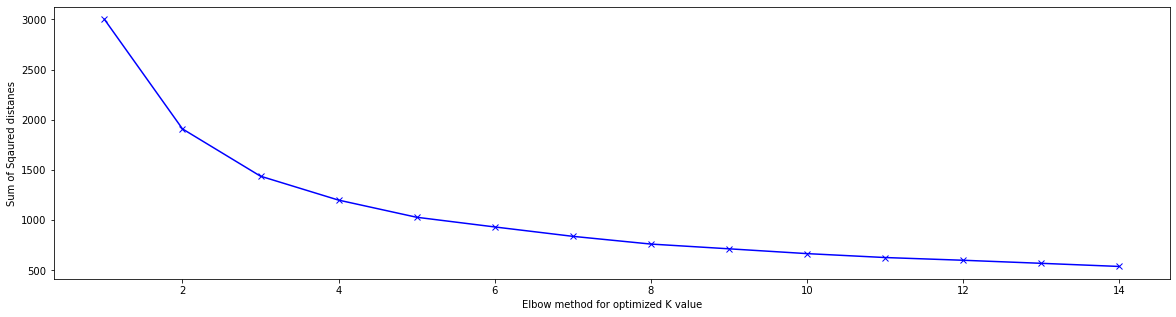

In [38]:
plt.figure(figsize=(20,5))
plt.plot(K,sum_of_squared_distances,'bx-')
plt.ylabel("Sum of Sqaured distanes")
plt.xlabel("Elbow method for optimized K value")
plt.show()

In [39]:
#graphical representation
km3=KMeans(n_clusters=3).fit(X1)
X1['Labels']=km3.labels_


C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Labels', ylabel='count'>

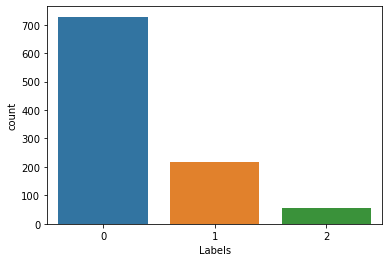

In [41]:
sns.countplot(X1['Labels'])

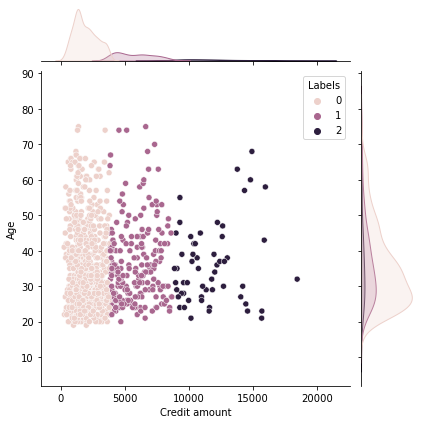

In [44]:
sns.jointplot(data=X1,x='Credit amount',y='Age',hue='Labels')